# Flop Counting & Performance Plot for Basic Implementation
<hr>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# --------------------------------------
# HARDWARE INFORMATION
# => Add your hardware information here
# --------------------------------------
hardware_info = "Intel(R) Core(TM) i9-8950HK CPU @ 2.90GHz \n" \
                "Cache Sizes - L1: 32KB, L2: 256KB, L3: 12MB \n" \
                "Compiler: Apple clang version 11.0.0 \n" \
                "OS: MacOS Catalina, 10.15.4";

In [3]:
FIGSIZE = (15,10)

### (A) Flop Counting 
$\rightarrow$ Functions to count flops of implemented methods

In [4]:
## ------------------------------------------
## Sub-Functions of Basic Implementation
## ------------------------------------------

def sure(n):
    adds =   12*n**2
    mults =  12*n**2
    divs =   0
    exps =   0
    minmax = 0 
    return np.array([adds, mults, divs, exps, minmax])

def flt_channel_basic(f, r, n):
    adds =   (n-2*(r+f))**2 * (2*r+1)**2 * (18*(2*f+1)**2 + 4) + (n-2*(r+f))**2
    mults =  (n-2*(r+f))**2 * (2*r+1)**2 * (9*(2*f+1)**2 + 5) 
    divs =   (n-2*(r+f))**2 * (2*r+1)**2 * (3*(2*f+1)**2 + 1)    + (n-2*(r+f))**2 
    exps =   (n-2*(r+f))**2 * (2*r+1)**2
    minmax = (n-2*(r+f))**2 * (2*r+1)**2 * (3*(2*f+1)**2 + 1)
    return np.array([adds, mults, divs, exps, minmax])


def flt_buffer_basic(f, r, n):
    adds =   (n-2*(r+f))**2 * (2*r+1)**2 * (18*(2*f+1)**2 + 6)  + 3*(n-2*(r+f))**2
    mults =  (n-2*(r+f))**2 * (2*r+1)**2 * (9*(2*f+1)**2 + 7) 
    divs =   (n-2*(r+f))**2 * (2*r+1)**2 * (3*(2*f+1)**2 + 1)    + 3*(n-2*(r+f))**2
    exps =   (n-2*(r+f))**2 * (2*r+1)**2 * (3*(2*f+1)**2 + 1)    + (n-2*(r+f))**2 
    minmax = (n-2*(r+f))**2 * (2*r+1)**2 * (3*(2*f+1)**2 + 1)
    return np.array([adds, mults, divs, exps, minmax])

def flt(f,r,n):
    adds =   (n-2*(r+f))**2 * (2*r+1)**2 * (18*(2*f+1)**2 + 15) + 8*(n-2*(r+f))**2 
    mults =  (n-2*(r+f))**2 * (2*r+1)**2 * (9*(2*f+1)**2 + 16)  + 12*(n-2*(r+f))**2
    divs =   (n-2*(r+f))**2 * (2*r+1)**2 * (3*(2*f+1)**2 +4)    + 3*(n-2*(r+f))**2 
    exps =   (n-2*(r+f))**2 * (2*r+1)**2 * (3*(2*f+1)**2 +2)    + (n-2*(r+f))**2
    minmax = (n-2*(r+f))**2 * (2*r+1)**2 * (3*(2*f+1)**2 +13)   + 6*(n-2*(r+f))**2
    return np.array([adds, mults, divs, exps, minmax])

def filter_averaging(n):
    adds = 12*n**2
    mults = 9*n**2
    divs = 9*n**2
    exps = 0
    minmax = 0 
    return np.array([adds, mults, divs, exps, minmax])

## --------------------------------------------
## Sub-Functions of Restructured Implementation
## --------------------------------------------

def sure_all(n):
    adds = 27 * n**2
    mults = 12 * n**2
    divs = 0
    exps = 0
    minmax = 0 
    return np.array([adds, mults, divs, exps, minmax])

def filtering_basic(f, r, n):
    adds = 2
    adds += (2*r+1)**2 * (n-2*r)**2 * 18                  
    adds += (2*r+1)**2 * (n-2*r)*(n-2*(r+f))*(2*f+1)
    adds += (2*r+1)**2 * (n-2*(r+f))**2 * (2*f+5)         
    
    mults = 5
    mults += (2*r+1)**2 * (n-2*r)**2 * 6 
    mults += (2*r+1)**2 * (n-2*(r+f))**2 * 5
    
    divs = 1
    divs += (2*r+1)**2 * (n-2*r)**2 * 3 
    divs += (n-2*(r+f))**2 * 3
    
    exps = (2*r+1)**2 * (n-2*(r+f))**2
                          
    minmax = (2*r+1)**2 * (n-2*r)**2 * 3
    minmax += (2*r+1)**2 * (n-2*(r+f))**2
    
    return np.array([adds, mults, divs, exps, minmax])

def feature_prefiltering(f, r, n):
    adds = 2
    adds += (2*r+1)**2 * (n-2*r)**2 * 18                 
    adds += (2*r+1)**2 * (n-2*r)*(n-2*(r+f)) * (2*f+1)
    adds += (2*r+1)**2 * (n-2*(r+f))**2 * (2*f+8)        
    
    mults = 5 
    mults += (2*r+1)**2 * (n-2*r)**2 * 6 
    mults += (2*r+1)**2 * (n-2*(r+f))**2 * 8
    
    divs = 1
    divs += (2*r+1)**2 * (n-2*r)**2 * 3  
    divs += (n-2*(r+f))**2 * 6
    
    exps = (2*r+1)**2 * (n-2*(r+f))**2
    
    minmax = (2*r+1)**2 * (n-2*r)**2 * 3
    minmax += (2*r+1)**2 * (n-2*(r+f))**2
    
    return np.array([adds, mults, divs, exps, minmax])

def candidate_filtering(f, r, n):
    adds = 2
    adds += (n-2*(r+f))**2 * 15
    adds += (2*r+1)**2 * (n-2*r)**2 * 18
    adds += (2*r+1)**2 * (n-2*(r+f))**2 * 9
    adds += (2*r+1)**2 * (n-2*r)*(n-2*(r+f))* (2*f+1)
    adds += (2*r+1)**2 * (n-2*(r+f))**2 * (2*f+5)
    
    mults = 5
    mults += (2*r+1)**2 * (n-2*r)**2 * 6
    mults += (2*r+1)**2 * (n-2*(r+f))**2 * 6
    mults += (2*r+1)**2 * (n-2*(r+f))**2 * 4
    
    divs =  1
    divs += (2*r+1)**2 * (n-2*r)**2 * 3
    divs += (2*r+1)**2 * (n-2*(r+f))**2 * 3
    divs += (n-2*(r+f))**2 * 3
    
    exps = (2*r+1)**2 * (n-2*(r+f))**2
    
    minmax = (n-2*(r+f))**2 * 6
    minmax += (2*r+1)**2 * (n-2*r)**2 * 3
    minmax += (2*r+1)**2 * (n-2*(r+f))**2 * 12
    minmax += (2*r+1)**2 * (n-2*(r+f))**2 * 1
    
    return np.array([adds, mults, divs, exps, minmax])

def candidate_filtering_THIRD(f, r, n):
    adds = 2
    adds += (n-2*(r+f))**2 * 15
    adds += (2*r+1)**2 * (n-2*(r+f))**2 * 9
    adds += (2*r+1)**2 * (n-2*(r+f))**2 * 4
    
    mults = 7
    mults += (2*r+1)**2 * (n-2*(r+f))**2 * 6
    mults += (2*r+1)**2 * (n-2*(r+f))**2 * 3
    
    divs = 1
    divs +=  (2*r+1)**2 * (n-2*r)**2 * 3
    divs +=  (n-2*(r+f))**2 * 3
    
    exps = (2*r+1)**2 * (n-2*(r+f))**2
    
    minmax = (n-2*(r+f))**2 * 6
    minmax += (2*r+1)**2 * (n-2*r)**2 * 3
    minmax += (2*r+1)**2 * (n-2*(r+f))**2 * 12
    
    return np.array([adds, mults, divs, exps, minmax])

def candidate_filtering_all(f_r, f_g, f_b, r, n):
    f_min = min(f_r, min(f_g, f_b))
    
    adds = 4
    adds += (n-2*(r+f_min))**2 * 15
    adds += (2*r+1)**2 * (n-2*r)**2 * 18
    adds += (2*r+1)**2 * (n-2*(r+f_min))**2 * 9
    adds += (2*r+1)**2 * (n-2*r)*(n-2*(r+f_r))* (2*f_r+1)
    adds += (2*r+1)**2 * (n-2*(r+f_r))**2 * (2*f_r+5)
    adds += (2*r+1)**2 * (n-2*r)*(n-2*(r+f_g))* (2*f_g+1)
    adds += (2*r+1)**2 * (n-2*(r+f_g))**2 * (2*f_g+5)
    adds += (2*r+1)**2 * (n-2*(r+f_b))**2 * 6
    
    mults = 14
    mults += (2*r+1)**2 * (n-2*r)**2 * 3
    mults += (2*r+1)**2 * (n-2*(r+f_min))**2 * 9
    mults += (2*r+1)**2 * (n-2*(r+f_r))**2 * 4
    mults += (2*r+1)**2 * (n-2*(r+f_g))**2 * 4
    mults += (2*r+1)**2 * (n-2*(r+f_b))**2 * 3
    
    divs = 2
    divs += (2*r+1)**2 * (n-2*r)**2 * 3
    divs += (2*r+1)**2 * (n-2*(r+f_min))**2 * 6
    divs += (n-2*(r+f_r))**2 * 3
    divs += (n-2*(r+f_g))**2 * 3
    divs += (n-2*(r+f_b))**2 * 3
    
    exps =  (2*r+1)**2 * (n-2*(r+f_b))**2
    exps += (2*r+1)**2 * (n-2*(r+f_r))**2
    exps += (2*r+1)**2 * (n-2*(r+f_g))**2
    
    minmax =  (n-2*(r+f_min))**2 * 3 
    minmax += (2*r+1)**2 * (n-2*r)**2 * 3
    minmax += (2*r+1)**2 * (n-2*(r+f_min))**2 * 18
    minmax += (2*r+1)**2 * (n-2*(r+f_r))**2 * 1
    minmax += (2*r+1)**2 * (n-2*(r+f_g))**2 * 1
    minmax += (2*r+1)**2 * (n-2*(r+f_b))**2 * 1
    
    return np.array([adds, mults, divs, exps, minmax])

def filter_averaging_improved(n):
    adds = 12*n**2
    mults = 9*n**2
    divs = 3*n**2
    exps = 0
    minmax = 0
    
    return np.array([adds, mults, divs, exps, minmax])

# --------------------------------------
# Main Methods
# --------------------------------------

def basic(n, R):

    # Compute op-count for one run of the basic implementation
    total = 2*flt_buffer_basic(3, 5, n)
    total += flt(1, R, n)
    total += flt(3, R, n)
    total += flt(1, R, n)
    total += (3*sure(n))
    total += (3*flt_channel_basic(1,1,n))
    total += flt_channel_basic(1, 5, n)
    total += filter_averaging(n)
    
    return total

def restructured_without_precomp(n, R):
    total =  2 * filtering_basic(3, 5, n)
    total += candidate_filtering(1, R, n)
    total += candidate_filtering(3, R, n)
    total += candidate_filtering_THIRD(1, R, n)
    total += sure_all(n)
    total += filtering_basic(1,1,n)
    total += filtering_basic(1, 5, n)
    total += filter_averaging_improved(n)
    
    return total

def restructured_with_precomp(n, R):
    
    total =  feature_prefiltering(3, 5, n)
    total += candidate_filtering_all(1, 3, 1, R, n)
    total += sure_all(n)
    total += filtering_basic(1,1,n)
    total += filtering_basic(1, 5, n)
    total += filter_averaging_improved(n)
    
    return total;

### (B) Memory Counting 
$\rightarrow$ Functions to count memory usage of implemented methods

In [5]:
sizeof_float = 4 # bytes

# Branch basic_impl
def basic_mem(n):
    # Read input image, features, variances and output image
    reads = 3*n*n + 3*n*n + 3*n*n + 3*n*n + 3*n*n
    # Additional buffers: filtered features and variance
    reads += 3*n*n + 3*n*n
    # Additional buffers: candidate filters
    reads += 3*3*n*n
    # Additional buffers: sure estimators
    reads += 3*n*n
    # Additional buffers: filtered errors
    reads += 3*n*n
    # Additional buffers: selection maps
    reads += 3*n*n
    # Additional buffers: filtered selection maps
    reads += 3*n*n
    # Temp buffers: gradients
    reads += 3*n*n
    return reads*sizeof_float

# Branch restructure_stable
def restructured_precomp_mem(n):
    # Read input image, features, variances and output image
    reads = 3*n*n + 3*n*n + 3*n*n + 3*n*n + 3*n*n
    # Additional buffers: filtered features and variance
    reads += 3*n*n + 3*n*n
    # Additional buffers: candidate filters
    reads += 3*3*n*n
    # Additional buffers: sure estimators
    reads += 3*n*n
    # Additional buffers: filtered errors
    reads += 3*n*n
    # Additional buffers: selection maps
    reads += 3*n*n
    # Additional buffers: filtered selection maps
    reads += 3*n*n
    # Temp buffers: prefiltering
    reads += 3*n*n
    # Temp buffers: filtering_all
    reads += 11*n*n
    # Temp buffer: filtering_basic
    reads += 2*3*n*n
    return reads*sizeof_float
  
def restructured_no_precomp_mem(n):
    # Read input image, features, variances and output image
    reads = 3*n*n + 3*n*n + 3*n*n + 3*n*n + 3*n*n
    # Additional buffers: filtered features and variance
    reads += 3*n*n + 3*n*n
    # Additional buffers: candidate filters
    reads += 3*3*n*n
    # Additional buffers: sure estimators
    reads += 3*n*n
    # Additional buffers: filtered errors
    reads += 3*n*n
    # Additional buffers: selection maps
    reads += 3*n*n
    # Additional buffers: filtered selection maps
    reads += 3*n*n
    # Temp buffers: prefiltering
    reads += 3*n*n
    # Temp buffer: filtering_basic
    reads += 5*3*n*n
    return reads*sizeof_float

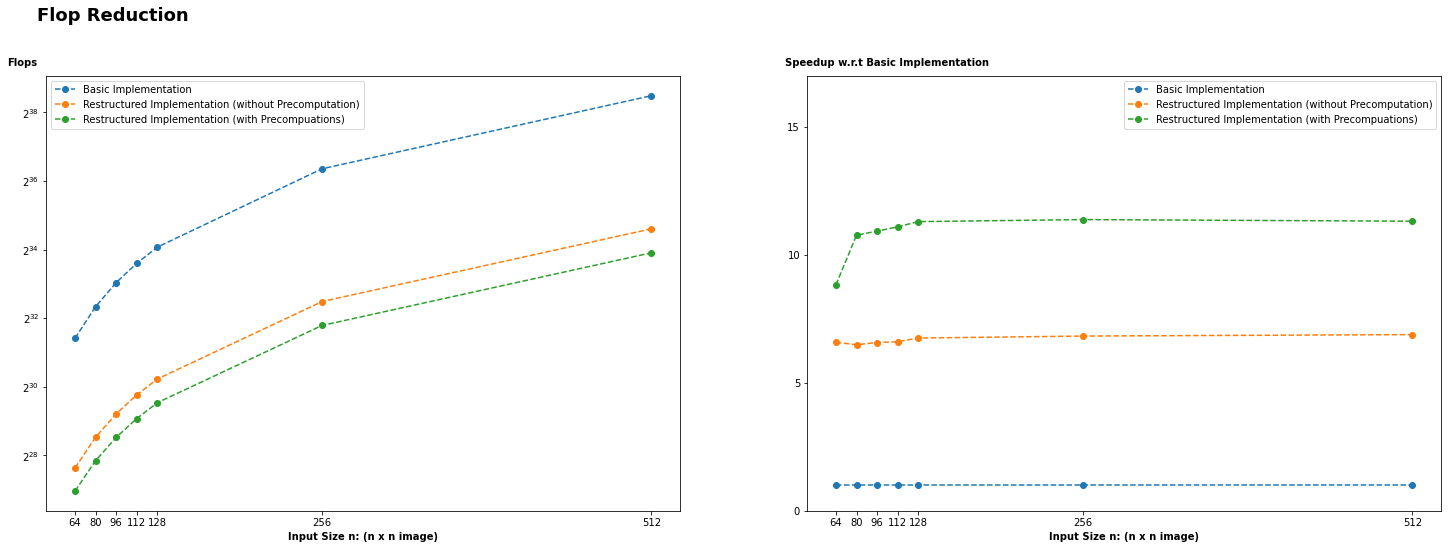

In [6]:
# Plot showing FLOP reduction for fixed R=10
R = 10
n = np.array([64, 80, 96, 112, 128, 256, 512])

method = ["Basic Implementation", 
          "Restructured Implementation (without Precomputation)",
          "Restructured Implementation (with Precompuations)"]

measured_cycles = [
    [2.72e9, 4.59e9, 7.50e9, 1.11e10, 1.56e10, 7.65e10, 3.43e11],
    [4.13e8, 7.07e8, 1.14e9, 1.68e9, 2.31e9, 1.12e10, 4.98e10],
    [3.08e8, 4.26e8, 6.86e8, 1.00e9, 1.38e9, 6.72e9, 3.03e10]
]

flop_counters = [basic, restructured_without_precomp, restructured_with_precomp]

fig, axs = plt.subplots(1, 2, figsize=(25,8))

flops = np.zeros((len(method), len(n)))
flops_improvement = np.zeros((len(method), len(n)))

## ---------------------
# Compute baseline flops
## ---------------------
for i, size in enumerate(n):
    flops[0][i] = np.sum(flop_counters[0](size, R))
    flops_improvement[0][i] = 1

axs[0].plot(n, flops[0], 'o--', label=method[0])
axs[1].plot(n, flops_improvement[0], 'o--', label=method[0])
   
## --------------------------------------------------------------
# Compute Flops and Improvement Factor for more advanced Methods
## --------------------------------------------------------------
for m, m_name in enumerate(method[1:]):
    for i, size in enumerate(n):
        flops[m+1][i] = np.sum(flop_counters[m+1](size, R))
        #flops_improvement[m+1][i] = flops[0][i] / flops[m+1][i]
        flops_improvement[m+1][i] = measured_cycles[0][i] / measured_cycles[m+1][i]
    
    # Plot flops and flop speedup factor
    axs[0].plot(n, flops[m+1], 'o--', label=m_name)
    axs[1].plot(n, flops_improvement[m+1], 'o--', label=m_name)
    
## ---------------------
# Customize Plot
## ---------------------

suptitle = plt.suptitle("Flop Reduction", x=0.12, y=1., fontsize=18, ha='left', fontweight='bold')

# Subplot 1
axs[0].set_ylabel("Flops", fontweight='bold', rotation=0, position=(0,1.02), labelpad=-0)
axs[0].set_xlabel("Input Size n: (n x n image)", fontweight='bold')
axs[0].set_xticks(n)
axs[0].set_yticks(np.arange(24, 48, step=4))
axs[0].set_yscale('log', basey=2)

# Subplot 2
axs[1].set_ylabel("Speedup w.r.t Basic Implementation", fontweight='bold', rotation=0, position=(0,1.02), labelpad=-100)
axs[1].set_xlabel("Input Size n: (n x n image)", fontweight='bold')
axs[1].set_ylim(0,17)
#axs[1].set_ylim(0,22)
axs[1].set_xticks(n)
axs[1].set_yticks(np.arange(0, 17, step=5))
#axs[1].set_yticks(np.arange(0, 22, step=5))


axs[0].legend()
axs[1].legend()

fig.savefig('flop_reduction',bbox_inches='tight',bbox_extra_artists=[suptitle])

### (B) Runtime Plots (fixed R=10)
...

In [7]:
# ------------
# MEASUREMENTS
# ------------

series = [
          "Basic Implementation",
          "Restructured (Without Precomputation, Scalar Replacement)",
          "Restructured (Without Precomputation, Scalar Replacement, Unrolling/SSA)",
          "Restructured (Precomputation, Scalar Replacement)",
          "Restructured (Precomputations, Scalar Replacement, Unrolling/SSA)",
]

series_method = [basic, 
                 restructured_without_precomp,
                 restructured_without_precomp,
                 restructured_with_precomp,
                 restructured_with_precomp]

colors = ["darkblue", "green", "orange", "purple", "red"]


n = np.array([64, 80, 96, 112, 128, 256, 512])

cycles = np.array([
                    [2.72e9, 4.59e9, 7.50e9, 1.11e10, 1.56e10, 7.65e10, 3.43e11],
                    [4.13e8, 7.07e8, 1.14e9, 1.68e9, 2.31e9, 1.12e10, 4.98e10],
                    [3.03e8, 5.53e8, 8.92e8, 1.29e9, 1.79e9, 8.52e9, 3.72e10],
                    [3.08e8, 4.26e8, 6.86e8, 1.00e9, 1.38e9, 6.72e9, 3.03e10],
                    [1.92e8, 3.54e8, 5.66e8, 8.27e8, 1.13e9, 5.44e9, 2.44e10]
                  ])

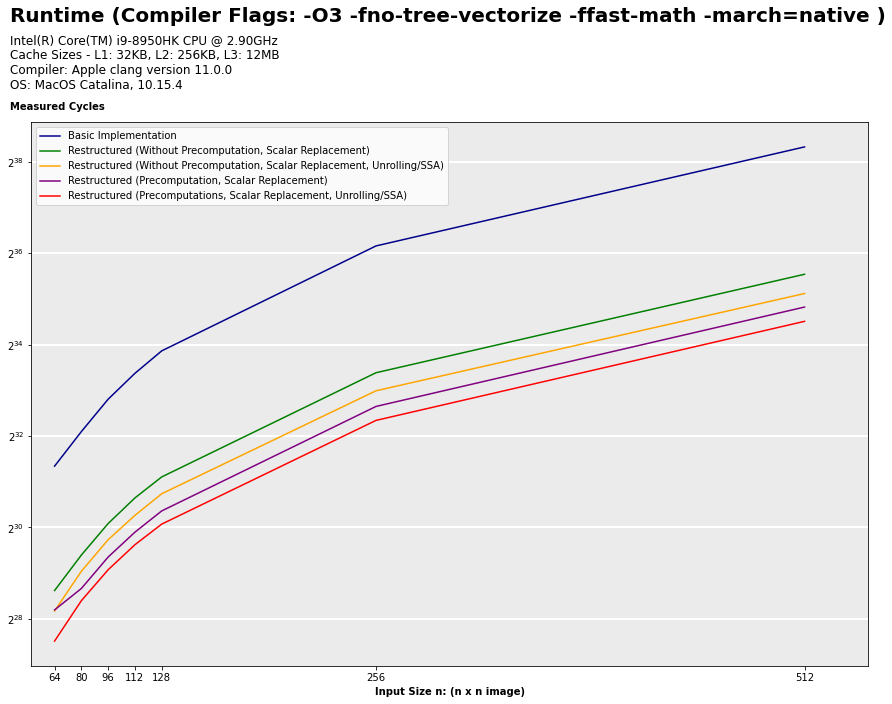

In [8]:
# ------------------------------------------------------
# RunTime-Plot (cylces are log-scaled)
# ------------------------------------------------------

# Init Plot
fig = plt.figure(figsize=FIGSIZE)
suptitle = plt.suptitle("Runtime (Compiler Flags: -O3 -fno-tree-vectorize -ffast-math -march=native )", x=0.105, y=1.04, fontsize=20, ha='left', fontweight='bold')
plt.title(hardware_info, fontsize=12, x=-0.025, y=1.05, ha='left') 

# Plot Series
for i, serie in enumerate(series):
    plt.plot(n, cycles[i], label=serie, color=colors[i])
    
    
# Customize Plot
plt.xticks(n)
plt.yscale('log', basey=2)
plt.xlim(50,550)

plt.grid(True, color='w', linestyle='-', linewidth=2)
plt.gca().patch.set_facecolor('0.92')
plt.gca().xaxis.grid(False)
plt.gca().yaxis.grid(True)

plt.ylabel("Measured Cycles", fontweight='bold', rotation=0, position=(0,1.02), labelpad=-50)
plt.xlabel("Input Size n: (n x n image)", fontweight='bold')

plt.legend()

fig.savefig('runtime_evaluation',bbox_inches='tight',bbox_extra_artists=[suptitle])

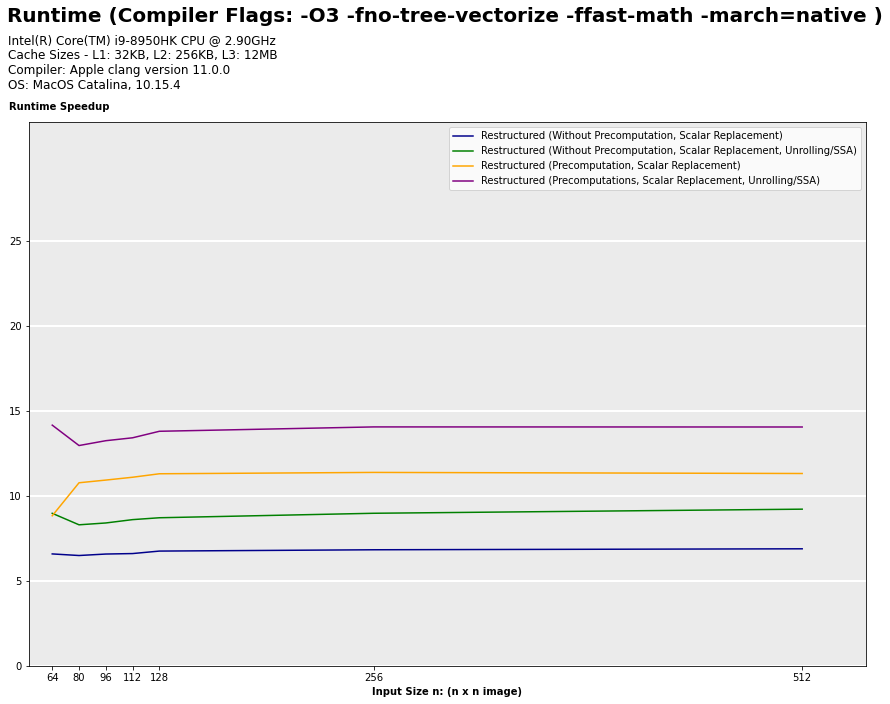

In [9]:
# ------------------------------------------------------
# Speedup-Plot
# ------------------------------------------------------

# Init Plot
fig = plt.figure(figsize=FIGSIZE)
suptitle = plt.suptitle("Runtime (Compiler Flags: -O3 -fno-tree-vectorize -ffast-math -march=native )", x=0.105, y=1.04, fontsize=20, ha='left', fontweight='bold')
plt.title(hardware_info, fontsize=12, x=-0.025, y=1.05, ha='left') 

# Plot Series
for i, serie in enumerate(series[1:]):
    plt.plot(n, cycles[0] / cycles[i+1], label=serie, color=colors[i])
    
    
# Customize Plot
top=30
plt.xticks(n)
plt.yticks(np.arange(0, top, step=5))
plt.xlim(50,550)
plt.ylim(0,32)

plt.grid(True, color='w', linestyle='-', linewidth=2)
plt.gca().patch.set_facecolor('0.92')
plt.gca().xaxis.grid(False)
plt.gca().yaxis.grid(True)

plt.ylabel("Runtime Speedup", fontweight='bold', rotation=0, position=(0,1.02), labelpad=-50)
plt.xlabel("Input Size n: (n x n image)", fontweight='bold')

plt.legend()

fig.savefig('speedup_runtime',bbox_inches='tight',bbox_extra_artists=[suptitle])

<hr>

## (C) Performance Plots (fixed R=10)
...

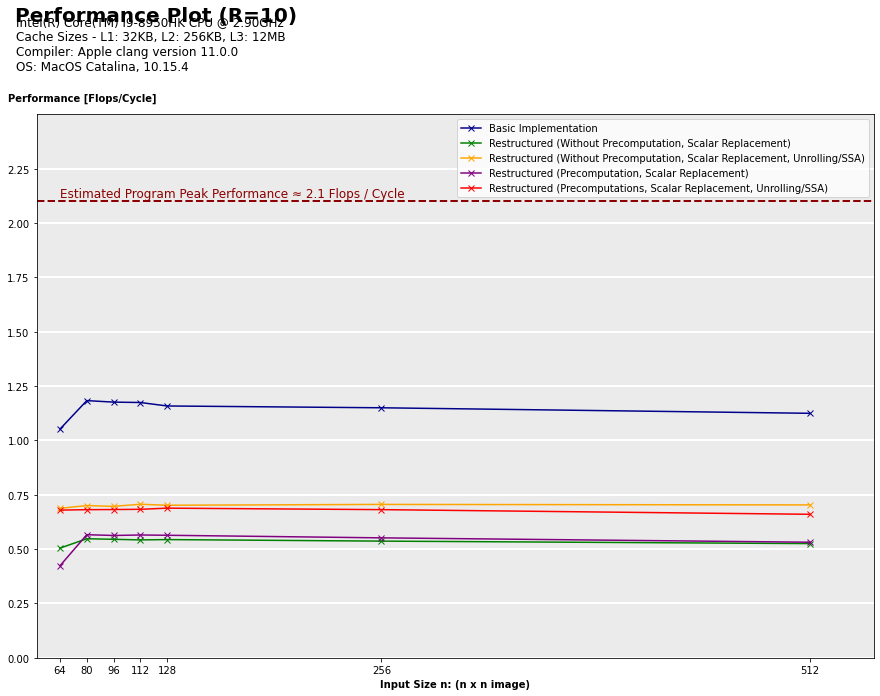

In [10]:
R = 10
performance = np.zeros((len(series), len(n)))

# Init Figure
fig = plt.figure(figsize=FIGSIZE)

# Compute Performance for all series (different compiler flags)
for i, flag in enumerate(series):
    
    # Compute Performance for all resolutions
    for j, size in enumerate(n):
        flop_count = series_method[i](size,R).sum()
            
        performance[i][j] = flop_count / cycles[i][j]
        
    # Add serie to plot
    plt.plot(n, performance[i], 'x-', label=flag, color=colors[i])


# Customize Plot 
top = 2.5
plt.xticks(n)
plt.yticks(np.arange(0, top, step=0.25))
plt.ylim(0,2.5)
plt.xlim(50,550)
plt.ylabel("Performance [Flops/Cycle]", fontweight='bold', rotation=0, position=(0,1.02), labelpad=-75)
plt.xlabel("Input Size n: (n x n image)", fontweight='bold')
plt.grid(True, color='w', linestyle='-', linewidth=2)
plt.gca().patch.set_facecolor('0.92')
plt.gca().xaxis.grid(False)
plt.gca().yaxis.grid(True)

# Add Estimated Tighter Program Peak Performance
plt.axhline(2.1, linestyle='--' , color="darkred", linewidth=2)
plt.text(64, 2.12, 'Estimated Program Peak Performance ≈ 2.1 Flops / Cycle', color="darkred", fontsize=12)

# Add Titles and Processor Information
suptitle = plt.suptitle("Performance Plot (R=10)", x=0.105, y=1.03, fontsize=20, ha='left', fontweight='bold')
plt.title(hardware_info, fontsize=12, x=-0.025, y=1.07, ha='left') 

plt.legend()
fig.savefig('performance_plot',bbox_inches='tight',bbox_extra_artists=[suptitle]) 

# Different tests

In [11]:
# ------------
# MEASUREMENTS
# ------------

series = [
          "Restructured (Precomputations, Scalar Replacement, Unrolling/SSA)",
          "1D arrays",
          "Blocking",
          "Optimize layout (Precomputations)",
          "Optimize layout (No precomputations)",
          "More ILP and autotuning"
]

series_method = [restructured_with_precomp,
                 restructured_with_precomp,
                restructured_with_precomp,
                restructured_with_precomp,
                restructured_without_precomp,
                restructured_with_precomp]

colors = ["darkblue", "green", "orange", "purple", "red", "blue"]



n = np.array([64, 80, 96, 112, 128, 256, 512])

cycles = np.array([
                    [1.92e8, 3.54e8, 5.66e8, 8.27e8, 1.13e9, 5.44e9, 2.44e10],
                    [1.49e8, 2.69e8, 4.43e8, 6.36e8, 8.79e8, 4.24e9, 1.86e10],
                    [2.61e8, 4.63e8, 7.51e8, 1.09e9, 1.51e9, 7.77e9, 3.37e10],
                    [1.5e8,2.88e8,4.44e8,6.40e8,8.84e8,4.30e9,1.83e10],
                    [2.26e8,4.08e8,6.61e8,9.31e8,1.29e9,6.14e9,2.64e10],
                    [1.56e8,2.72e8,4.36e8, 6.43e8, 8.63e8, 4.16e9, 1.8e10]
                  ])

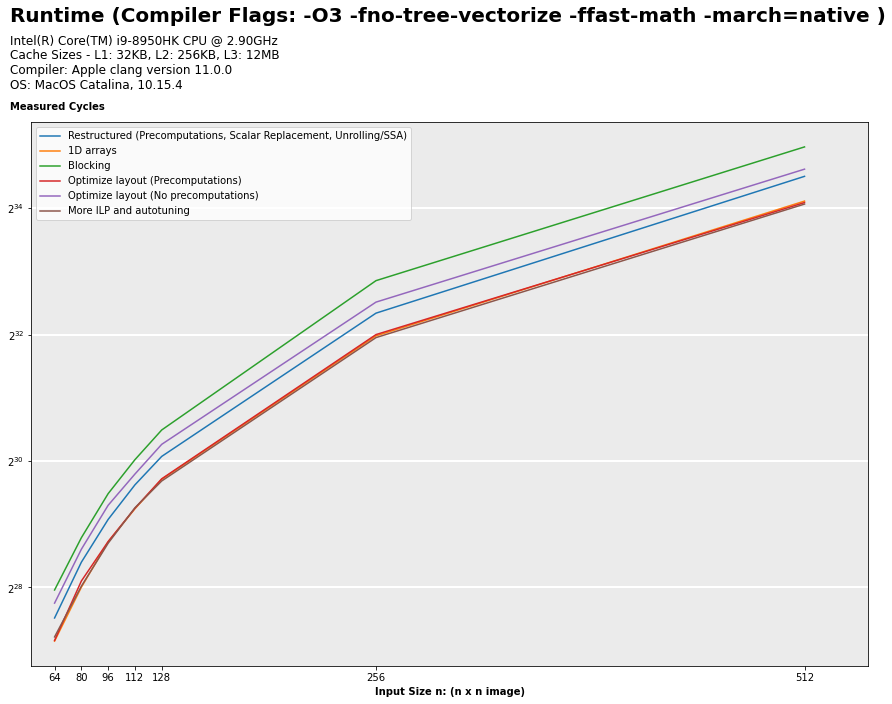

In [12]:
# ------------------------------------------------------
# RunTime-Plot (cylces are log-scaled)
# ------------------------------------------------------

# Init Plot
fig = plt.figure(figsize=FIGSIZE)
suptitle = plt.suptitle("Runtime (Compiler Flags: -O3 -fno-tree-vectorize -ffast-math -march=native )", x=0.105, y=1.04, fontsize=20, ha='left', fontweight='bold')
plt.title(hardware_info, fontsize=12, x=-0.025, y=1.05, ha='left') 

# Plot Series
for i, serie in enumerate(series):
    plt.plot(n, cycles[i], label=serie)
    
    
# Customize Plot
plt.xticks(n)
plt.yscale('log', basey=2)
plt.xlim(50,550)

plt.grid(True, color='w', linestyle='-', linewidth=2)
plt.gca().patch.set_facecolor('0.92')
plt.gca().xaxis.grid(False)
plt.gca().yaxis.grid(True)

plt.ylabel("Measured Cycles", fontweight='bold', rotation=0, position=(0,1.02), labelpad=-50)
plt.xlabel("Input Size n: (n x n image)", fontweight='bold')

plt.legend()

fig.savefig('runtime_evaluation',bbox_inches='tight',bbox_extra_artists=[suptitle])

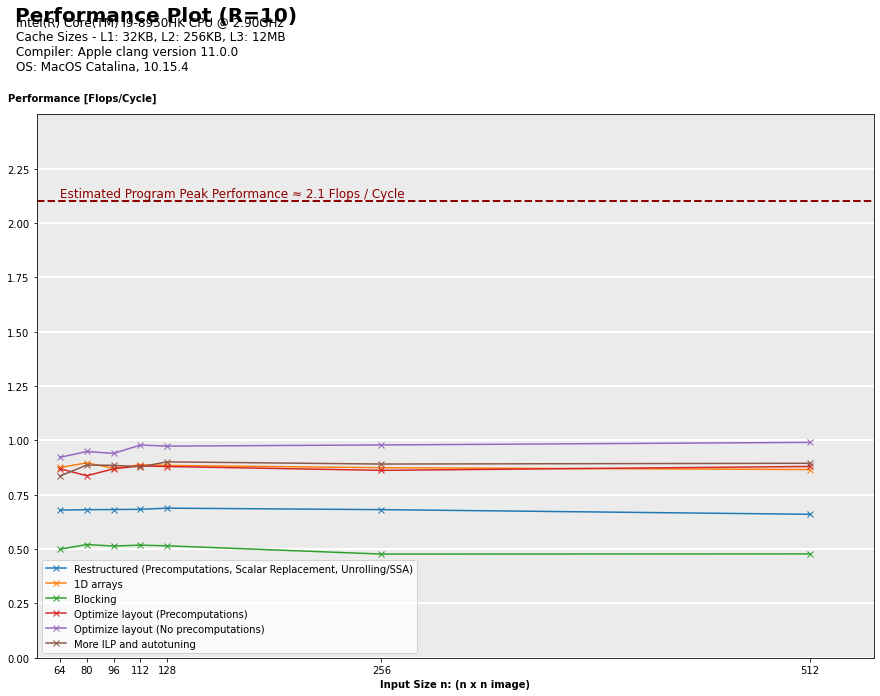

In [13]:
R = 10
performance = np.zeros((len(series), len(n)))

# Init Figure
fig = plt.figure(figsize=FIGSIZE)

# Compute Performance for all series (different compiler flags)
for i, flag in enumerate(series):
    
    # Compute Performance for all resolutions
    for j, size in enumerate(n):
        flop_count = series_method[i](size,R).sum()
            
        performance[i][j] = flop_count / cycles[i][j]
        
    # Add serie to plot
    plt.plot(n, performance[i], 'x-', label=flag)


# Customize Plot 
top = 2.5
plt.xticks(n)
plt.yticks(np.arange(0, top, step=0.25))
plt.ylim(0,2.5)
plt.xlim(50,550)
plt.ylabel("Performance [Flops/Cycle]", fontweight='bold', rotation=0, position=(0,1.02), labelpad=-75)
plt.xlabel("Input Size n: (n x n image)", fontweight='bold')
plt.grid(True, color='w', linestyle='-', linewidth=2)
plt.gca().patch.set_facecolor('0.92')
plt.gca().xaxis.grid(False)
plt.gca().yaxis.grid(True)

# Add Estimated Tighter Program Peak Performance
plt.axhline(2.1, linestyle='--' , color="darkred", linewidth=2)
plt.text(64, 2.12, 'Estimated Program Peak Performance ≈ 2.1 Flops / Cycle', color="darkred", fontsize=12)

# Add Titles and Processor Information
suptitle = plt.suptitle("Performance Plot (R=10)", x=0.105, y=1.03, fontsize=20, ha='left', fontweight='bold')
plt.title(hardware_info, fontsize=12, x=-0.025, y=1.07, ha='left') 

plt.legend()
fig.savefig('performance_plot',bbox_inches='tight',bbox_extra_artists=[suptitle]) 

### (D) Performance Plots (varying R)
$\rightarrow $ Measurments from: **Restructured (Precomputations, Scalar Replacement, Unrolling/SSA**, compiled with **-O3 -ffast-math -march=native -fno-tree-vectorize**

In [14]:
# MEASUREMENTS (for varying R) => for 

R = np.array([3,5,7,9,11,13,15])

n = [128,
     256,
     512]

cycles = np.array([
                  [2.4031e+08, 3.43009e+08, 5.06411e+08, 6.68815e+08, 8.32015e+08, 1.02981e+09, 1.12602e+09],
                  [8.69864e+08, 1.28235e+09, 1.90508e+09, 2.65239e+09, 3.52729e+09, 4.69081e+09, 5.69446e+09],
                  [3.49434e+09, 5.15235e+09, 7.49704e+09, 1.07271e+10, 1.44232e+10, 1.86136e+10, 2.32936e+10]
                ])

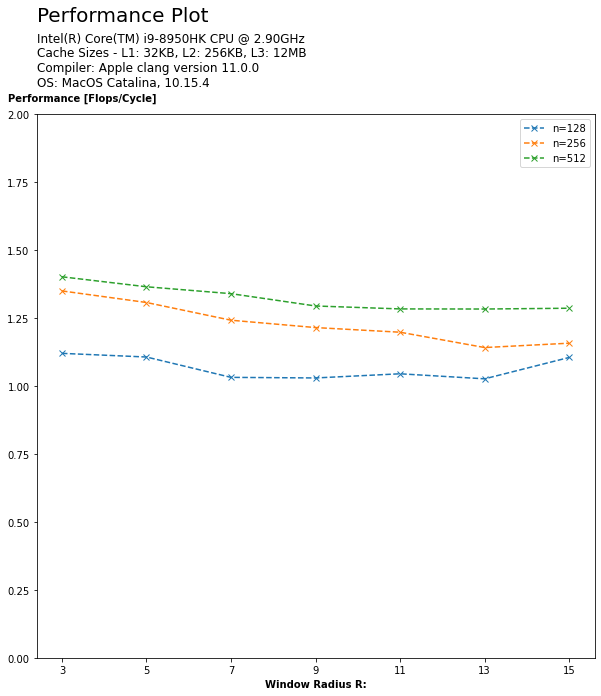

In [15]:
# ------------------------------------------------------
# PERFORMANCE PLOT
# => Basic Implementation with varying window size R
# ------------------------------------------------------

performance = np.zeros((len(n), len(R)))

# Init Figure
fig = plt.figure(figsize=(10,10))

for i, img_size in enumerate(n):
    
    # Compute performance for all windows sizes r 
    for r, win_size in enumerate(R):
        flop_count = restructured_with_precomp(img_size, win_size).sum()
        performance[i][r] = flop_count / cycles[i][r]
   
    plt.plot(R, performance[i], 'x--', label="n="+str(img_size))
             
# Customize Plot
plt.xticks(R)
plt.ylim(0,2)
plt.ylabel("Performance [Flops/Cycle]", fontweight='bold', rotation=0, position=(0,1.02), labelpad=-75)
plt.xlabel("Window Radius R:", fontweight='bold')

suptitle = plt.suptitle("Performance Plot", x=0.125, y=1.03, fontsize=20, ha='left')
plt.title(hardware_info, fontsize=12, x=0, y=1.04, ha='left') 

plt.legend()
fig.savefig('performance_plot_varyingR',bbox_inches='tight',bbox_extra_artists=[suptitle]) 



<hr>

## Some Plots about Basic Implementation (more to come)

In [16]:
# ------------------------------------------------------
# MEASURED CYCLES 
# => copy output arrays of performance evaluation script
# ------------------------------------------------------

n = np.array([32, 64, 128, 256, 512, 1024])

flags = ["-O0", 
         "-O2 -ffast-math -fno-tree-vectorize -march=native", 
         "-O3 -ffast-math -fno-tree-vectorize -march=native",
         "-O3 -ffast-math -march=native"]

cycles2 = np.array([
                   [1.16444e+09, 1.58887e+10, 1.03663e+11, 4.9517e+11, 2.13943e+12, 9.18644e+12],
                   [1.73864e+08, 2.31693e+09, 1.54683e+10, 7.70771e+10, 3.38752e+11, 1.49306e+12],
                   [1.73331e+08, 2.34056e+09, 1.56838e+10, 7.67893e+10, 3.35903e+11, 1.50166e+12],
                   [1.78634e+08, 2.38234e+09, 1.59441e+10, 7.81457e+10, 3.38922e+11, 1.54974e+12]
                  ])

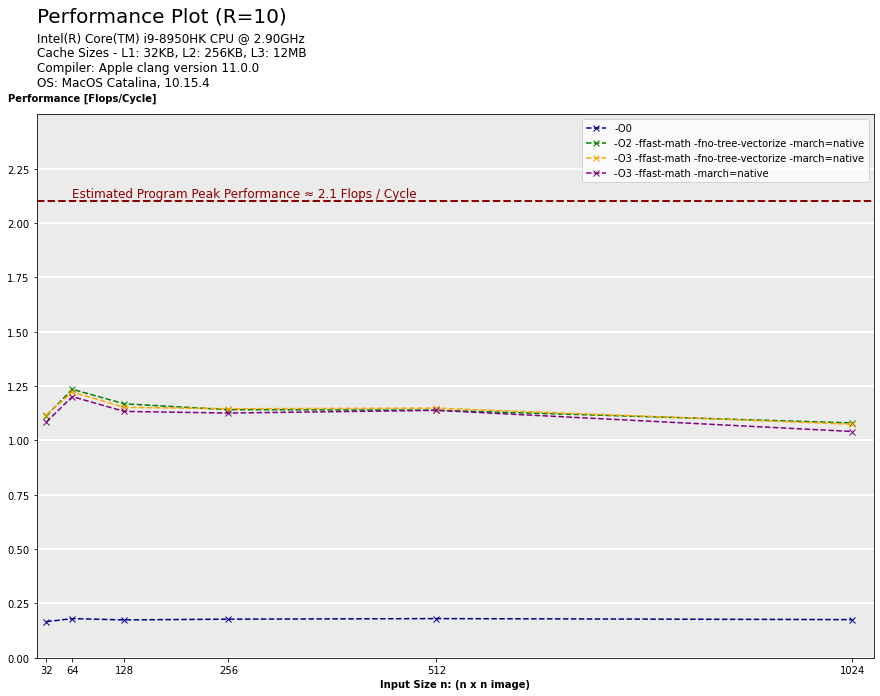

In [17]:
# ------------------------------------------------------
# PERFORMANCE PLOT
# => Basic Implementation with different compiler flags
# ------------------------------------------------------

R = 10
performance = np.zeros((len(flags), len(n)))

# Init Figure
fig = plt.figure(figsize=FIGSIZE)

# Compute Performance for all series (different compiler flags)
for i, flag in enumerate(flags):
    
    # Compute Performance for all resolutions
    for j in range(n.shape[0]):
        flop_count = basic(n[j],R).sum()
        performance[i][j] = flop_count / cycles2[i][j]
        
    # Add serie to plot
    plt.plot(n, performance[i], 'x--', label=flag, c=colors[i])

# Customize Plot 
top=2.5
plt.xticks(n)
plt.yticks(np.arange(0, top, step=0.25))
plt.ylim(0,top)
plt.xlim(20,1050)
plt.ylabel("Performance [Flops/Cycle]", fontweight='bold', rotation=0, position=(0,1.02), labelpad=-75)
plt.xlabel("Input Size n: (n x n image)", fontweight='bold')
plt.grid(True, color='w', linestyle='-', linewidth=2)
plt.gca().patch.set_facecolor('0.92')
plt.gca().xaxis.grid(False)
plt.gca().yaxis.grid(True)

# Add Estimated Tighter Program Peak Performance
plt.axhline(2.1, linestyle='--' , color="darkred", linewidth=2)
plt.text(64, 2.12, 'Estimated Program Peak Performance ≈ 2.1 Flops / Cycle', color="darkred", fontsize=12)


suptitle = plt.suptitle("Performance Plot (R=10)", x=0.125, y=1.03, fontsize=20, ha='left')
plt.title(hardware_info, fontsize=12, x=0, y=1.04, ha='left') 

plt.legend()
fig.savefig('performance_plot',bbox_inches='tight',bbox_extra_artists=[suptitle]) 

# Roofline 

In [18]:
n = np.array([64, 80, 96, 112, 128, 256, 512])

labels = ["Basic Implementation",
          "Restructure",
          "Restructure + ILP/SSA",
          "Restructure + Precomputations",
          "Restructure + Precomputations + ILP/SSA",
         "Restructure + Precomputations + ILP/SSA + Vectorization",
         "Restructure + ILP/SSA + Vectorization"]

colors = ["darkblue", "green", "yellow", "red", "lightblue", "darkred", "purple"]

## Basic Implementation
basic_W = np.array([5.16e9, 9.72e9, 1.57e10, 2.32e10])
basic_W = np.array([np.sum(basic(n_,10)) for n_ in n[:4]])
basic_Q = 8*np.array([2.94e6, 6.12e6, 1.00e7, 1.50e7])
basic_T = [2.34056e+09, 4.391e+09, 7.03867e+09, 1.04147e+10] #, 1.56838e+10, 7.67893e+10, 3.35903e+11]

## Restructure
restructure_W = np.array([6.26e8, 1.15e9, 1.82e9, 2.66e9, 3.66e9])
restructure_W = np.array([np.sum(restructured_without_precomp(n_,10)) for n_ in n[:5]])
restructure_Q = 8*np.array([7.88e6, 1.40e7, 2.15e7, 3.03e7, 4.07e7])
restructure_T = np.array([2.34514e+08, 4.12235e+08, 6.44091e+08, 9.45838e+08, 1.35092e+09]) #, 5.67884e+09, 2.33792e+10])

## Restructure + ILP/SSA
restructure_ILP_W = np.array([4.99e8, 9.08e8, 1.44e9, 2.10e9, 2.88e9])
restructure_ILP_W = np.array([np.sum(restructured_without_precomp(n_,10)) for n_ in n[:5]])
restructure_ILP_Q = 8*np.array([7.34e6, 1.29e7, 1.96e7, 2.75e7, 3.73e7])
restructure_ILP_T = np.array([1.74196e+08, 2.9709e+08, 4.40938e+08, 6.59861e+08, 9.48041e+08]) #, 3.8352e+09, 1.50545e+10])

## Restructure + Precomputations
restructure_prec_W = np.array([4.52e8, 8.32e8, 1.33e9, 1.94e9, 2.67e9])
restructure_prec_W = np.array([np.sum(restructured_with_precomp(n_,10)) for n_ in n[:5]])
restructure_prec_Q = 8*np.array([5.34e6, 9.31e6, 1.42e7, 2.00e7, 2.70e7])
restructure_prec_T = np.array([1.96556e+08, 3.58303e+08, 5.55418e+08, 8.15635e+08, 1.15446e+09]) #, 4.88418e+09, 2.00017e+10])

## Restructure + Precomputations + ILP/SSA
restructure_all_W = np.array([3.55e8, 6.48e8, 1.03e9, 1.50e9, 2.05e9])
restructure_all_W = np.array([np.sum(restructured_with_precomp(n_,10)) for n_ in n[:5]])
restructure_all_Q = 8*np.array([5.26e6, 9.11e6, 1.38e7, 1.96e7, 2.65e7])
restructure_all_T = np.array([1.40112e+08, 2.53714e+08, 3.81054e+08, 5.84901e+08, 7.98086e+08]) #, 3.15657e+09, 1.28795e+10])

## Restructure + ILP/SSA + Vectorization
vec_W = 8*np.array([1.55e8, 2.79e8, 4.13e8, 6.07e8, 7.75e8])
vec_W = np.array([np.sum(restructured_without_precomp(n_,10)) for n_ in n[:5]])
vec_Q = 8*np.array([7.82e6, 1.37e7, 2.09e7, 2.97e7, 3.97e7])
vec_T = np.array([7.32048e+07, 1.40616e+08, 1.70901e+08, 3.03807e+08, 3.8975e+08]) #, 1.61036e+09, 7.45095e+09])

## Restructure + Precomputations + ILP/SSA + Vectorization
vectorized_W = 8*np.array([1.08e8, 2.00e8, 2.91e8, 4.32e8, 5.42e8, 2.40e9, 1.01e10])
vectorized_W = np.array([np.sum(restructured_with_precomp(n_,10)) for n_ in n])
vectorized_Q = 8*np.array([5.36e6, 9.27e6, 1.40e7, 2.00e7, 2.66e7, 1.24e8, 5.68e8])
vectorized_T = np.array([4.04298e+07, 1.19248e+08, 1.58619e+08, 2.43336e+08, 2.98338e+08, 1.27235e+09, 5.61482e+09])

data = [[basic_W, basic_Q, basic_T],
        [restructure_W, restructure_Q, restructure_T],
        [restructure_ILP_W, restructure_ILP_Q, restructure_ILP_T],
        [restructure_prec_W, restructure_prec_Q, restructure_prec_T],
        [restructure_all_W, restructure_all_Q, restructure_all_T],
        [vectorized_W, vectorized_Q, vectorized_T],
        [vec_W, vec_Q, vec_T]]

In [19]:
def add_roofline_points():
    for i,d in enumerate(data):
        w, q, t = d
        plt.plot(w/q, w/t, 'x-', label=labels[i], color=colors[i])
    

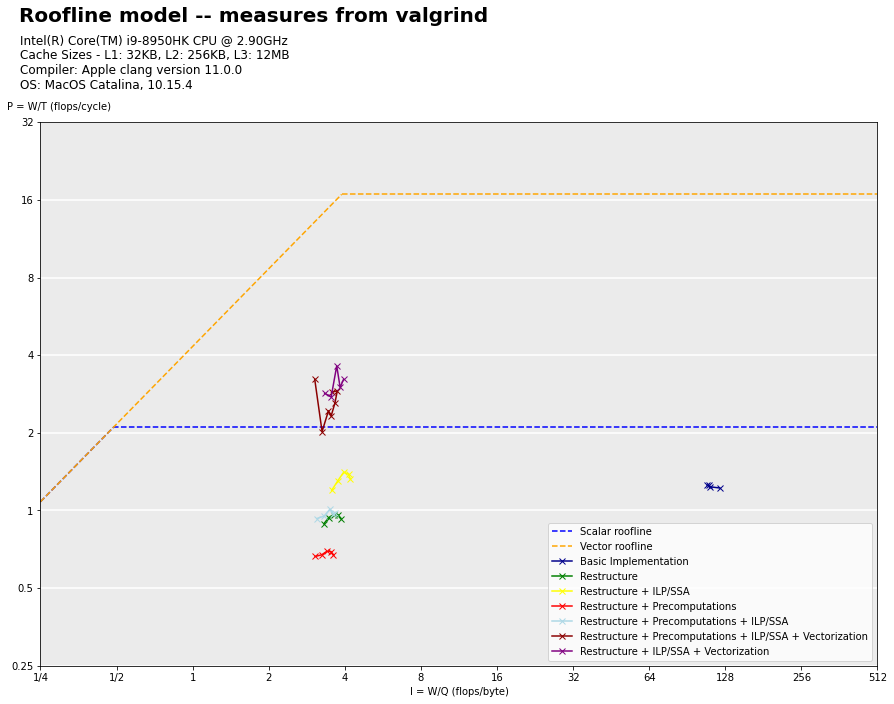

In [25]:
PI = 2.1
BETA = 0.6 * 41.8 / 2 / 2.9 # in bytes/cycle

x_values = [2**x for x in range(-2,10)]
y_values = [2**x for x in range(-2,6)]

plt.figure(figsize=(15,10))
scalar_mem_line = []
scalar_comp_line = [PI/BETA]
for x in x_values:
    if x < PI/BETA:
        scalar_mem_line.append(x)
    else:
        scalar_comp_line.append(x)
scalar_mem_line.append(PI/BETA)

plt.plot(scalar_comp_line, [PI for c in scalar_comp_line], linestyle='--', color='blue', label="Scalar roofline")
plt.plot(scalar_mem_line, BETA*np.array(scalar_mem_line), linestyle='--', color='blue')

vector_mem = []
vector_comp = [8*PI/BETA]
for x in x_values:
    if x < 8*PI/BETA:
        vector_mem.append(x)
    else:
        vector_comp.append(x)
vector_mem.append(8*PI/BETA)

plt.plot(vector_comp, [8*PI for c in vector_comp], color='orange', linestyle='--', label="Vector roofline")
plt.plot(vector_mem, BETA*np.array(vector_mem), color='orange', linestyle='--')

add_roofline_points()

plt.xlabel('I = W/Q (flops/byte)')
plt.xscale('log', basex=2)
plt.xlim((x_values[0], x_values[-1]))
plt.xticks(x_values, [str(x) if x >= 1 else "1/{}".format(int(1/x)) for x in x_values])


plt.ylabel('P = W/T (flops/cycle)', rotation='horizontal', ha='left', y=1.02)
plt.yscale('log', basey=2)
plt.ylim((y_values[0], y_values[-1]))
plt.yticks(y_values, [str(x) for x in y_values])

plt.grid(True, color='w', linestyle='-', linewidth=2)
plt.gca().patch.set_facecolor('0.92')
plt.gca().xaxis.grid(False)
plt.gca().yaxis.grid(True)

plt.grid(which='both', axis='y', alpha=.8)
suptitle = plt.suptitle("Roofline model -- measures from valgrind", x=0.105, y=1.04, fontsize=20, ha='left', fontweight='bold')
plt.title(hardware_info, fontsize=12, x=-0.025, y=1.05, ha='left') 
plt.legend()
plt.show()